In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load data
# sample_url="https://drive.google.com/uc?export=download&id=1ekCjJOTjGD0OASErwVnwhJuPD0hFfCEF"
# out_url=sample_url
sample = "sample_kinder_data.csv"
# db_sample=pd.read_csv(sample_url)
db_sample=pd.read_csv(sample)
db_out=pd.read_csv(sample)



# EDA

## Finding missing values

In [ ]:
# How many null values per col
db_out.isnull().sum().sort_values(ascending=False)

,0
ladder,511
score_read,417
score_math,354
t_ethnicity,52
lunch,21
experience,19
degree,19
birth,5
ethnicity,1
gender,0


In [ ]:
# Drop rows with missing target values
db_sample = db_sample.dropna(subset=['score_read', 'score_math', 'ladder'])

# count missing values per col
missing = db_sample.isna().sum().to_frame("missing_count")
missing["total_rows"] = len(db_sample)
missing["missing_percent"] = (missing["missing_count"] / missing["total_rows"]) * 100
missing

,missing_count,total_rows,missing_percent
score_read,0,4189,0.000000
score_math,0,4189,0.000000
gender,0,4189,0.000000
birth,2,4189,0.047744
lunch,14,4189,0.334209
ethnicity,0,4189,0.000000
class_type,0,4189,0.000000
school,0,4189,0.000000
degree,0,4189,0.000000
ladder,0,4189,0.000000


## Identifying outliers

Numeric columns: ['score_read', 'score_math', 'experience', 'schooldistrict_id', 'school_id']
score_read: 109 outliers (2.60%)
score_math: 152 outliers (3.63%)
experience: 28 outliers (0.67%)
schooldistrict_id: 0 outliers (0.00%)
school_id: 0 outliers (0.00%)


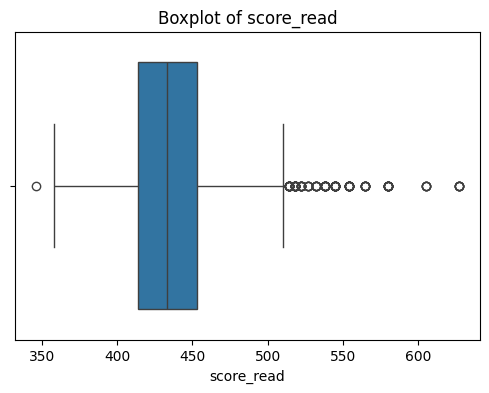

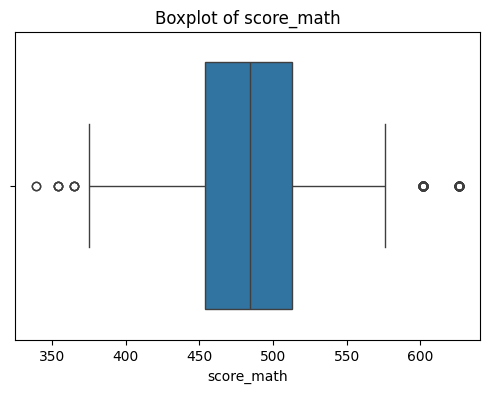

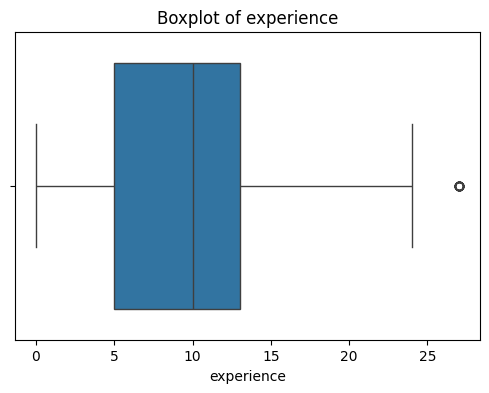

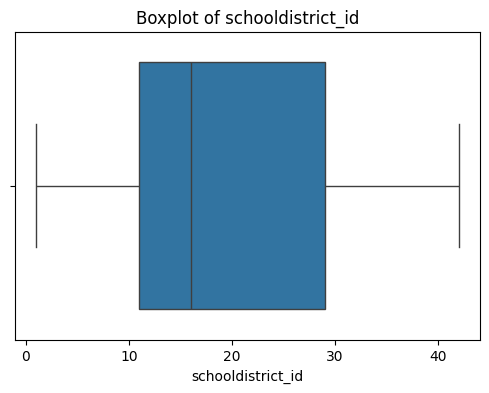

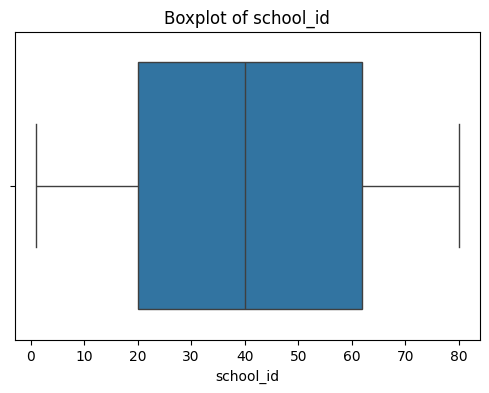

      score_read  score_math
2329       627.0       626.0
4814       627.0       626.0
3978       627.0       602.0
1742       627.0       576.0
3794       627.0       576.0
      experience  score_read  score_math
74          27.0       448.0       547.0
180         27.0       447.0       506.0
349         27.0       437.0       444.0
774         27.0       430.0       468.0
930         27.0       425.0       489.0
951         27.0       436.0       489.0
1079        27.0       425.0       434.0
1117        27.0       408.0       434.0
1240        27.0       437.0       500.0
1316        27.0       450.0       576.0
1969        27.0       434.0       536.0
1995        27.0       428.0       463.0
2108        27.0       382.0       434.0
2127        27.0       421.0       454.0
2185        27.0       418.0       459.0
2230        27.0       407.0       423.0
2346        27.0       463.0       506.0
2411        27.0       403.0       473.0
2876        27.0       410.0       459.0
2959  

In [ ]:
# identify any outliers
#Identify numeric columns
num_cols = db_sample.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", num_cols.tolist())

# Detect outliers using IQR
for col in num_cols:
    Q1 = db_sample[col].quantile(0.25)
    Q3 = db_sample[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((db_sample[col] < lower) | (db_sample[col] > upper)).sum()
    total = len(db_sample[col])
    print(f"{col}: {outliers} outliers ({outliers/total*100:.2f}%)")

for col in num_cols:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=db_sample[col])
  plt.title(f"Boxplot of {col}")
  plt.show()


print(db_sample[['score_read', 'score_math']].sort_values(by=['score_read', 'score_math'], ascending=False).head(5))

def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] < lower) | (df[col] > upper)]

# Example: Outliers in 'experience'
outliers_exp = detect_outliers(db_sample, 'experience')
print(outliers_exp[['experience', 'score_read', 'score_math']])


## Distributions


Numeric columns (5): ['score_read', 'score_math', 'experience', 'schooldistrict_id', 'school_id']
Categorical columns (9): ['gender', 'birth', 'lunch', 'ethnicity', 'class_type', 'school', 'degree', 'ladder', 't_ethnicity']


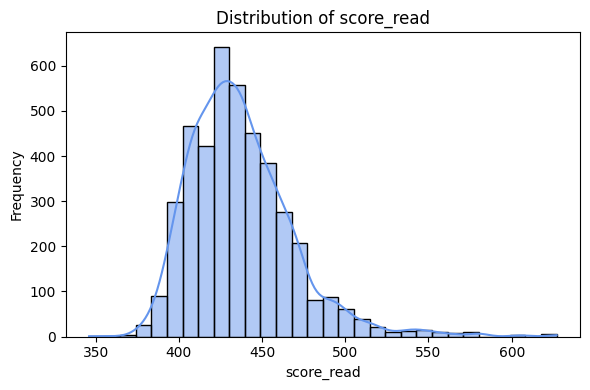

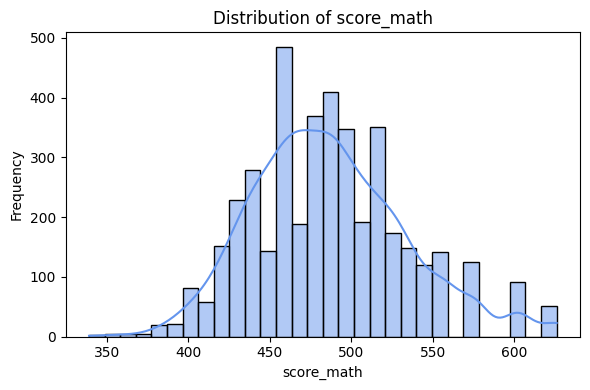

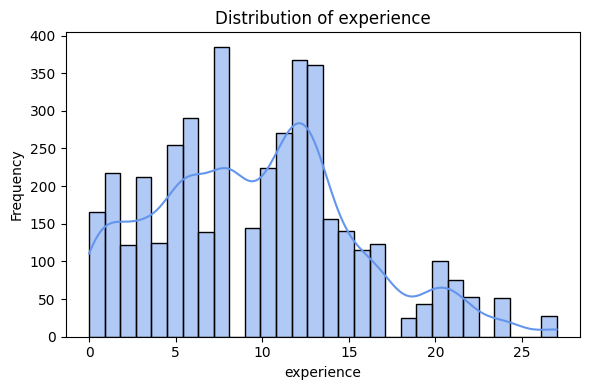

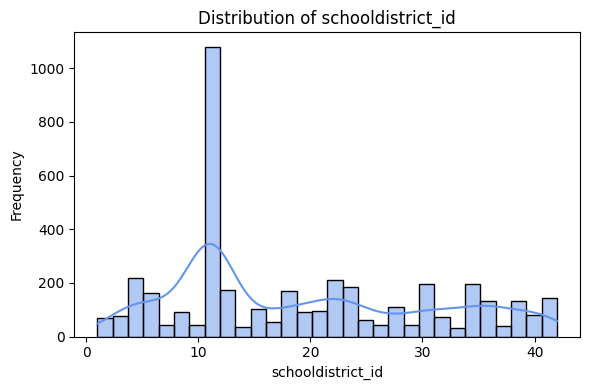

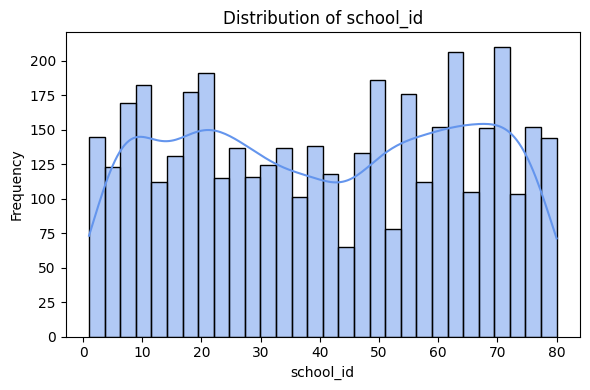

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = db_sample.select_dtypes(include=["int64", "float64"]).columns
cat_cols = db_sample.select_dtypes(exclude=["int64", "float64"]).columns

print(f"\nNumeric columns ({len(num_cols)}): {list(num_cols)}")
print(f"Categorical columns ({len(cat_cols)}): {list(cat_cols)}")

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(db_sample[col].dropna(), kde=True, bins=30, color="cornflowerblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-1292885859.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='score_read', data=db_sample, palette='Blues')


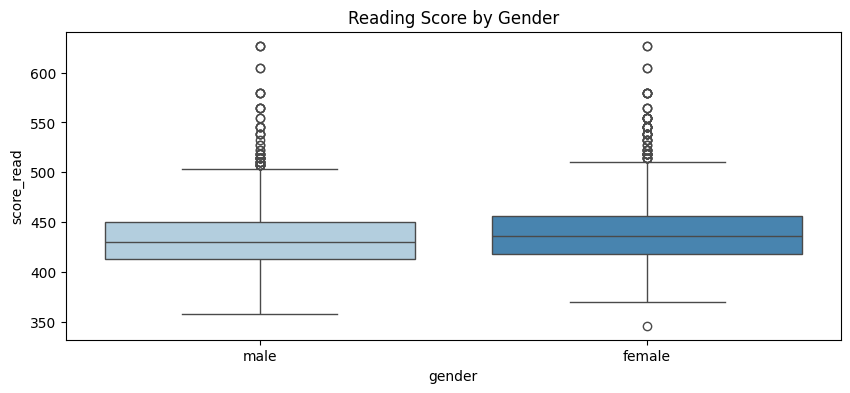

/tmp/ipython-input-1292885859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='score_math', data=db_sample, palette='Reds')


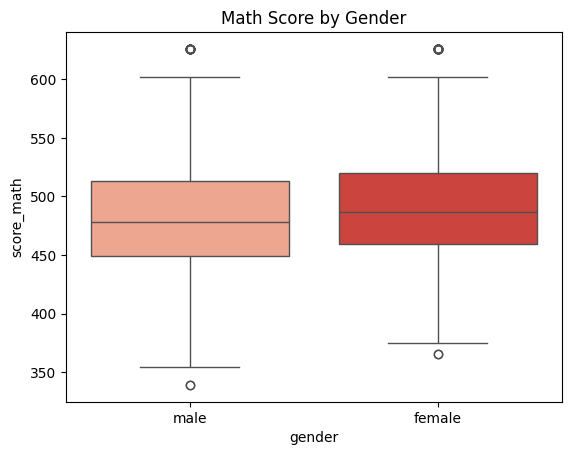

/tmp/ipython-input-1292885859.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='score_read', data=db_sample, palette='Purples')


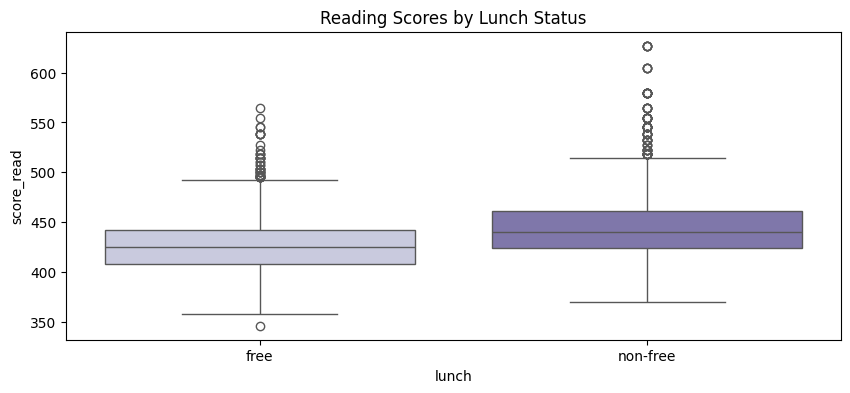

/tmp/ipython-input-1292885859.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='lunch', y='score_math', data=db_sample, palette='Greens')


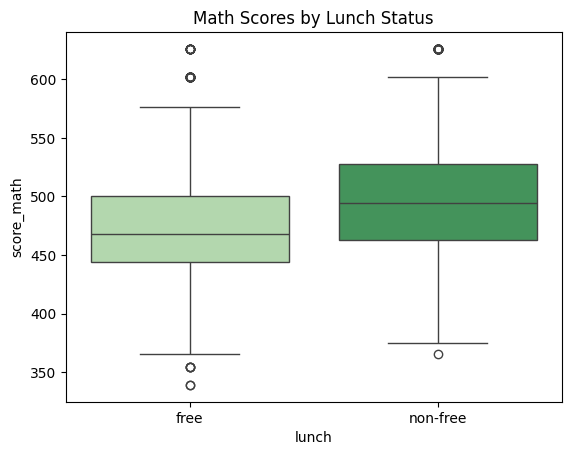

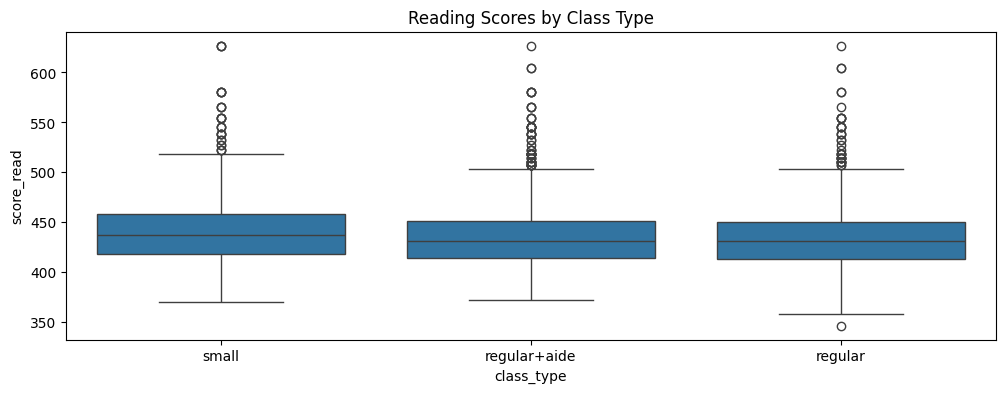

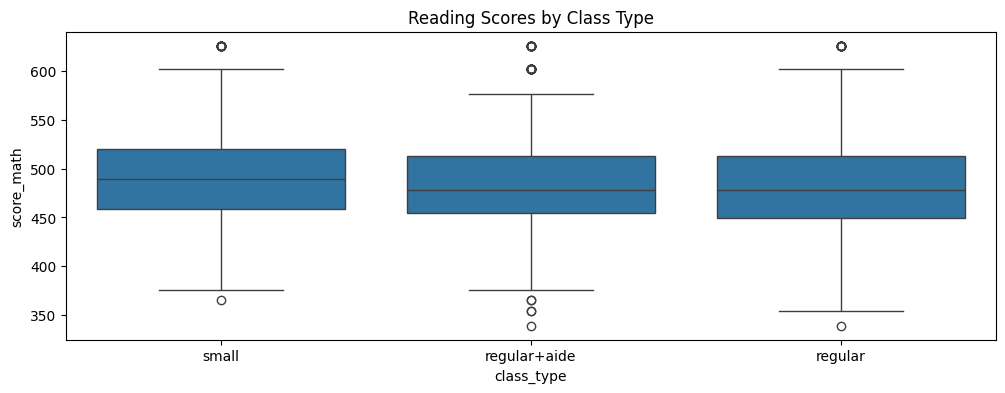

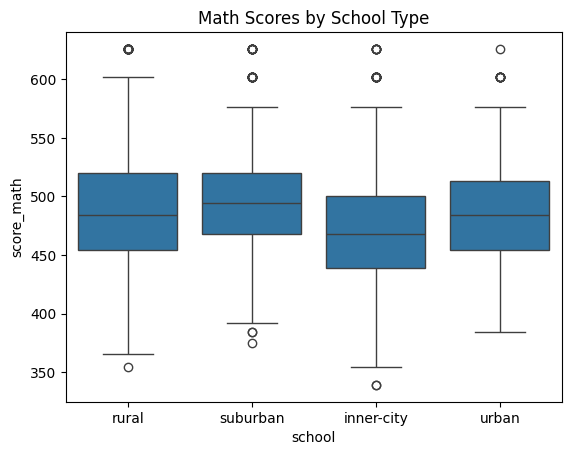

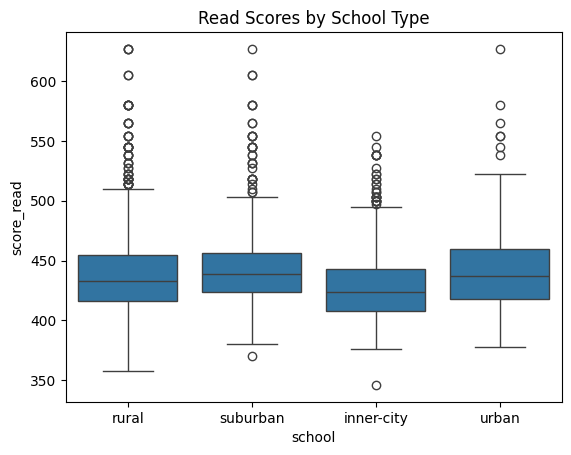

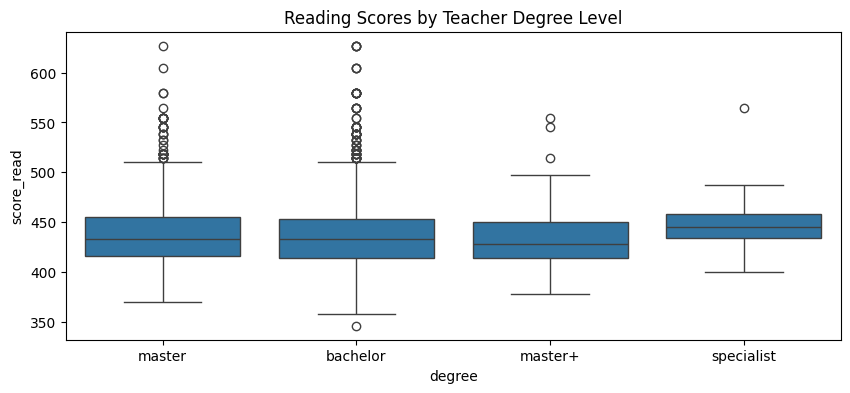

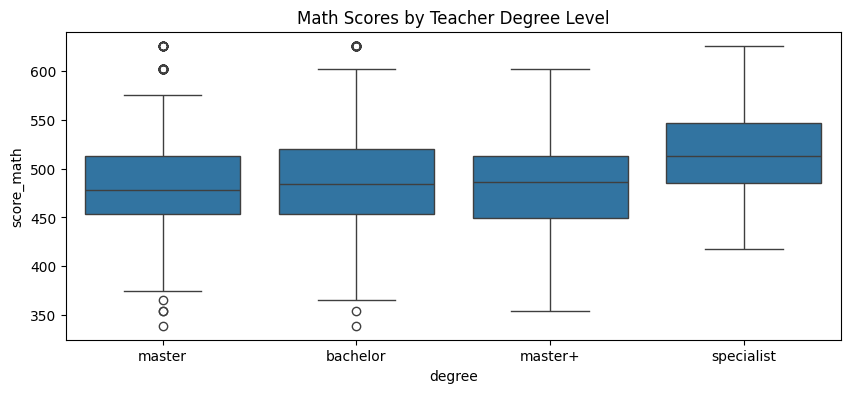

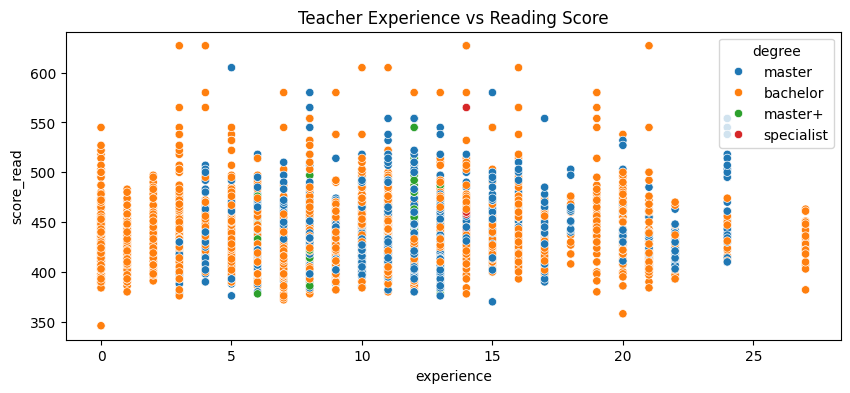

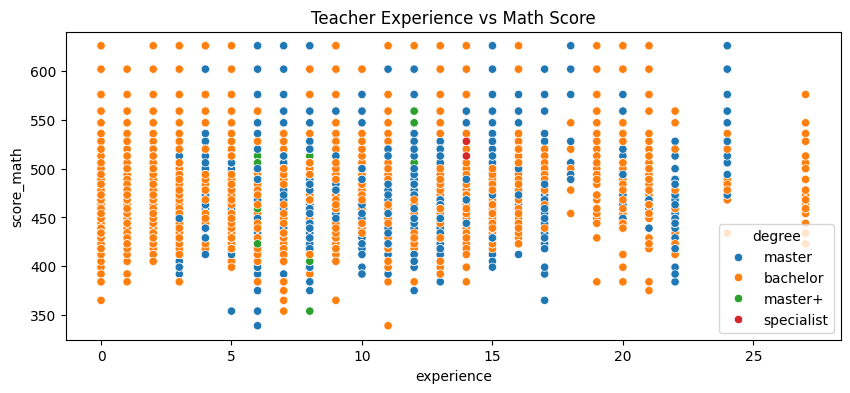

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(x='gender', y='score_read', data=db_sample, palette='Blues')
plt.title('Reading Score by Gender')
plt.show()

sns.boxplot(x='gender', y='score_math', data=db_sample, palette='Reds')
plt.title('Math Score by Gender')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='lunch', y='score_read', data=db_sample, palette='Purples')
plt.title('Reading Scores by Lunch Status')
plt.show()

sns.boxplot(x='lunch', y='score_math', data=db_sample, palette='Greens')
plt.title('Math Scores by Lunch Status')
plt.show()

plt.figure(figsize=(12,4))
sns.boxplot(x='class_type', y='score_read', data=db_sample)
plt.title('Reading Scores by Class Type')
plt.show()


plt.figure(figsize=(12,4))
sns.boxplot(x='class_type', y='score_math', data=db_sample)
plt.title('Reading Scores by Class Type')
plt.show()


sns.boxplot(x='school', y='score_math', data=db_sample)
plt.title('Math Scores by School Type')
plt.show()

sns.boxplot(x='school', y='score_read', data=db_sample)
plt.title('Read Scores by School Type')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='degree', y='score_read', data=db_sample)
plt.title('Reading Scores by Teacher Degree Level')
plt.show()

plt.figure(figsize=(10,4))
sns.boxplot(x='degree', y='score_math', data=db_sample)
plt.title('Math Scores by Teacher Degree Level')
plt.show()

plt.figure(figsize=(10,4))
sns.scatterplot(x='experience', y='score_read', data=db_sample, hue='degree')
plt.title('Teacher Experience vs Reading Score')
plt.show()

plt.figure(figsize=(10,4))
sns.scatterplot(x='experience', y='score_math', data=db_sample, hue='degree')
plt.title('Teacher Experience vs Math Score')
plt.show()

/tmp/ipython-input-287887383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=db_sample, x="class_type", order=order, palette="muted")


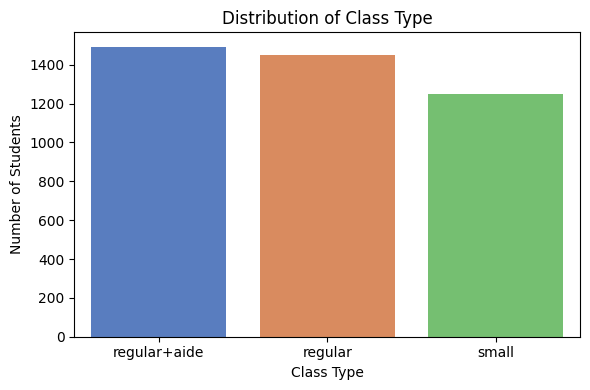

/tmp/ipython-input-287887383.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=db_sample, x="school", order=order, palette="Set2")


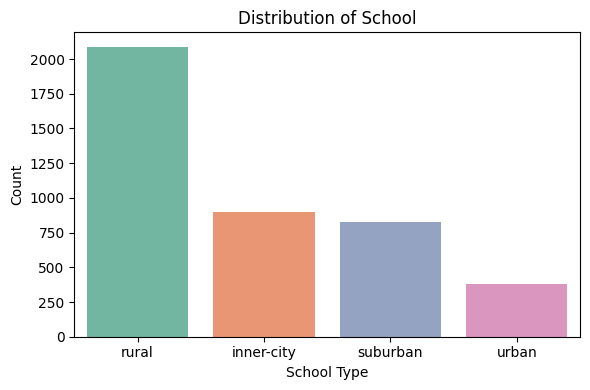

In [ ]:
plt.figure(figsize=(6, 4))
order = db_sample["class_type"].value_counts().index
sns.countplot(data=db_sample, x="class_type", order=order, palette="muted")
plt.title("Distribution of Class Type")
plt.xlabel("Class Type")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
order = db_sample["school"].value_counts().index
sns.countplot(data=db_sample, x="school", order=order, palette="Set2")
plt.title("Distribution of School")
plt.xlabel("School Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Birth analysis

In [ ]:
import pandas as pd
school_counts = db_sample['birth'].value_counts()
print(school_counts)

birth
1980 Q3    1096
1980 Q1    1030
1980 Q2     994
1979 Q4     760
1979 Q3     135
1979 Q2      62
1980 Q4      42
1979 Q1      35
1978 Q4      24
1981 Q1       2
1978 Q3       2
1981 Q4       2
1981 Q3       1
1978 Q2       1
1978 Q1       1
Name: count, dtype: int64


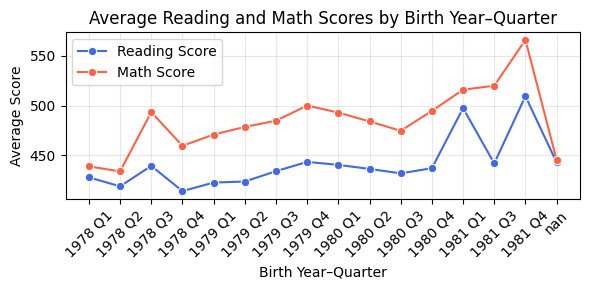

In [ ]:
# Ensure birth column is string (for proper sorting)
db_sample['birth'] = db_sample['birth'].astype(str)

# Compute mean scores grouped by birth year–quarter
birth_scores = (
    db_sample.groupby('birth')[['score_read', 'score_math']]
    .mean()
    .reset_index()
    .sort_values('birth')
)

# Set up plot
plt.figure(figsize=(6,3))

# Reading scores
sns.lineplot(
    data=birth_scores,
    x='birth',
    y='score_read',
    marker='o',
    label='Reading Score',
    color='royalblue'
)

# Math scores
sns.lineplot(
    data=birth_scores,
    x='birth',
    y='score_math',
    marker='o',
    label='Math Score',
    color='tomato'
)

plt.title('Average Reading and Math Scores by Birth Year–Quarter')
plt.xlabel('Birth Year–Quarter')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Label Encoded Correlation Heatmap Matrix

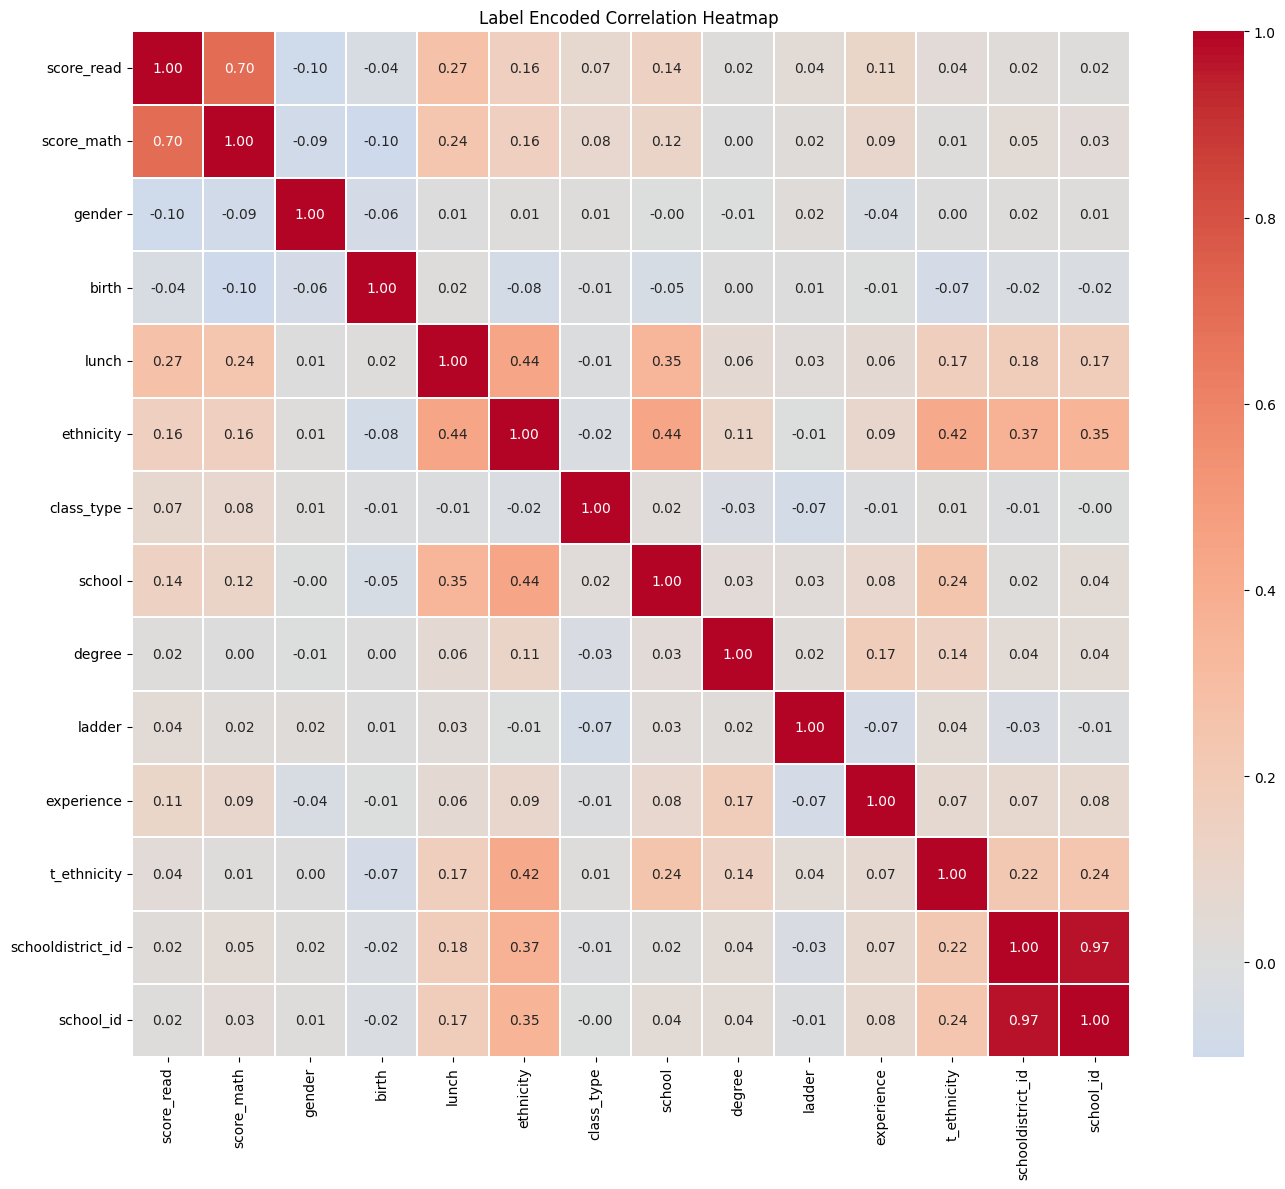

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import numpy as np
import pandas as pd

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


df_label = db_sample.copy()

# Identify categorical columns
cat_cols = df_label.select_dtypes(include=['object']).columns.tolist()

# Label-encode each categorical column
for col in cat_cols:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col].astype(str))

# Compute correlation matrix
corr_matrix = df_label.corr()

# Plot heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.2,
    # annot=False
        annot=True,
    fmt=".2f"
)
plt.title("Label Encoded Correlation Heatmap ")
plt.tight_layout()
plt.show()

# Cleaning data after EDA

In [ ]:
import pandas as pd

def clean_data(df):

    # Drop rows with missing target values
    df = df.dropna(subset=['score_read', 'score_math'])

    # Drop 'ladder, 'schooldistrict_id'
    df = df.drop(columns=['ladder', 'schooldistrict_id'], errors='ignore')

    # Fix numeric column: experience
    df['experience'] = df['experience'].fillna(df['experience'].median())

    # Fix ethnicity BEFORE filling Unknown
    df['ethnicity'] = df['ethnicity'].apply(
        lambda x: x if x in ['cauc', 'afam'] else 'other'
    )

    # Replace missing categorical values
    df = df.fillna({
        'ethnicity': 'other',
        'lunch': 'Unknown',
        'birth': 'Unknown',
        'class_type': 'Unknown',
        't_ethnicity': 'Unknown',
        'degree': 'Unknown'
    })

    # Fix degree categories
    df['degree'] = df['degree'].apply(
        lambda x: x if x in ['bachelor', 'master'] else 'other'
    )

    return df

df_clean = clean_data(db_sample.copy())

## Removing outliers

In [ ]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return df[(df[col] >= lower) & (df[col] <= upper)]

df_clean = df_clean.copy()

for col in ['score_read', 'score_math', 'experience']:
    df_clean = remove_outliers_iqr(df_clean, col)

## Splitting Dataset, Scaling and One-Hot Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

X = df_clean.drop(columns=['score_read', 'score_math'])
y_read = df_clean['score_read']
y_math = df_clean['score_math']

X_train, X_test, y_read_train, y_read_test, y_math_train, y_math_test = train_test_split(
    X, y_read, y_math, test_size=0.2, random_state=42
)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = make_column_transformer(
    (StandardScaler(), num_cols),
    (OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
)

# Modelling section

## Linear Regression + Regularisation

In [ ]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
import numpy as np
import pandas as pd

models = {
    "OLS": LinearRegression(),
    "LASSO": LassoCV(cv=5, random_state=42),
    "RIDGE": RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5),
    "ELASTIC NET": ElasticNetCV(cv=5, l1_ratio=np.linspace(0.1, 1, 10), random_state=42)
}

results = {"MODEL": [], "READ MSE": [], "MATH MSE": [], "MSE_o": []}

# Train each model twice
from sklearn.pipeline import Pipeline

for name, model in models.items():

    # Reading
    pipe_read = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    pipe_read.fit(X_train, y_read_train)
    pred_read = pipe_read.predict(X_test)
    mse_read = np.mean((pred_read - y_read_test)**2)

    # Math
    pipe_math = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    pipe_math.fit(X_train, y_math_train)
    pred_math = pipe_math.predict(X_test)
    mse_math = np.mean((pred_math - y_math_test)**2)

    # Combined MSE
    mse_o = ((pred_read - y_read_test)**2 + (pred_math - y_math_test)**2).mean() / 2

    results["MODEL"].append(name)
    results["READ MSE"].append(mse_read)
    results["MATH MSE"].append(mse_math)
    results["MSE_o"].append(mse_o)

pd.DataFrame(results)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categ

,MODEL,READ MSE,MATH MSE,MSE_o
0,OLS,580.719215,1576.473902,1078.596559
1,LASSO,580.716393,1574.148233,1077.432313
2,RIDGE,580.721880,1575.902986,1078.312433
3,ELASTIC NET,580.716393,1575.365948,1078.041170


### feature importance for regularised linear models

In [ ]:
feature_importances = {}

for name, model in models.items():

    # Reading
    pipe_read = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    pipe_read.fit(X_train, y_read_train)

    # Extract coefficients and feature names
    feature_names = pipe_read.named_steps["prep"].get_feature_names_out()
    clean_feature_names = [f.split("__")[-1] for f in feature_names]

    coefs = pipe_read.named_steps["model"].coef_

    df_read = pd.DataFrame({
        "feature": clean_feature_names,
        "coef": coefs,
        "abs_coef": np.abs(coefs)
    }).sort_values("abs_coef", ascending=False)

    feature_importances[f"{name}_READ"] = df_read

    # Math
    pipe_math = Pipeline([
        ("prep", preprocessor),
        ("model", model)
    ])
    pipe_math.fit(X_train, y_math_train)

    feature_names = pipe_math.named_steps["prep"].get_feature_names_out()
    clean_feature_names = [f.split("__")[-1] for f in feature_names]

    coefs = pipe_math.named_steps["model"].coef_

    df_math = pd.DataFrame({
        "feature": clean_feature_names,
        "coef": coefs,
        "abs_coef": np.abs(coefs)
    }).sort_values("abs_coef", ascending=False)

    feature_importances[f"{name}_MATH"] = df_math

# Show top 10 features for each model
for key, df in feature_importances.items():
    print(f"Top 10 Feature Importances – {key}:")
    display(df.head(10))

Top 10 Feature Importances – OLS_READ:


,feature,coef,abs_coef
14,birth_1981 Q1,49.504079,49.504079
16,lunch_free,-32.733474,32.733474
15,birth_1981 Q4,23.916814,23.916814
17,lunch_non-free,-21.861159,21.861159
5,birth_1978 Q4,-21.616990,21.616990
27,t_ethnicity_afam,21.487476,21.487476
28,t_ethnicity_cauc,18.648522,18.648522
7,birth_1979 Q2,-12.023129,12.023129
3,birth_1978 Q2,-11.190064,11.190064
6,birth_1979 Q1,-8.474047,8.474047


Top 10 Feature Importances – OLS_MATH:


,feature,coef,abs_coef
14,birth_1981 Q1,51.866519,51.866519
15,birth_1981 Q4,48.930067,48.930067
4,birth_1978 Q3,41.092284,41.092284
9,birth_1979 Q4,39.357295,39.357295
16,lunch_free,-36.310850,36.310850
10,birth_1980 Q1,34.623191,34.623191
13,birth_1980 Q4,29.690427,29.690427
11,birth_1980 Q2,28.268953,28.268953
7,birth_1979 Q2,26.859745,26.859745
6,birth_1979 Q1,26.385631,26.385631


Top 10 Feature Importances – LASSO_READ:


,feature,coef,abs_coef
14,birth_1981 Q1,42.751695,42.751695
16,lunch_free,-20.727691,20.727691
5,birth_1978 Q4,-16.376094,16.376094
27,t_ethnicity_afam,14.485283,14.485283
28,t_ethnicity_cauc,11.674780,11.674780
17,lunch_non-free,-9.782555,9.782555
7,birth_1979 Q2,-7.206808,7.206808
18,ethnicity_cauc,6.687886,6.687886
15,birth_1981 Q4,5.906836,5.906836
2,gender_male,-4.418389,4.418389


Top 10 Feature Importances – LASSO_MATH:


,feature,coef,abs_coef
16,lunch_free,-13.913081,13.913081
9,birth_1979 Q4,11.188050,11.188050
5,birth_1978 Q4,-9.165662,9.165662
18,ethnicity_cauc,8.983098,8.983098
12,birth_1980 Q3,-8.433189,8.433189
2,gender_male,-6.603748,6.603748
10,birth_1980 Q1,6.549460,6.549460
21,class_type_small,5.723242,5.723242
27,t_ethnicity_afam,5.691660,5.691660
23,school_suburban,4.643474,4.643474


Top 10 Feature Importances – RIDGE_READ:


,feature,coef,abs_coef
14,birth_1981 Q1,44.369928,44.369928
16,lunch_free,-29.512595,29.512595
5,birth_1978 Q4,-20.708446,20.708446
27,t_ethnicity_afam,19.702150,19.702150
15,birth_1981 Q4,19.431084,19.431084
17,lunch_non-free,-18.625395,18.625395
28,t_ethnicity_cauc,16.874454,16.874454
7,birth_1979 Q2,-11.252077,11.252077
3,birth_1978 Q2,-8.261926,8.261926
6,birth_1979 Q1,-7.697303,7.697303


Top 10 Feature Importances – RIDGE_MATH:


,feature,coef,abs_coef
9,birth_1979 Q4,9.981150,9.981150
12,birth_1980 Q3,-8.320627,8.320627
18,ethnicity_cauc,7.992587,7.992587
16,lunch_free,-7.710502,7.710502
2,gender_male,-6.270425,6.270425
17,lunch_non-free,6.086462,6.086462
10,birth_1980 Q1,5.920677,5.920677
21,class_type_small,5.335509,5.335509
23,school_suburban,4.909575,4.909575
5,birth_1978 Q4,-4.329345,4.329345


Top 10 Feature Importances – ELASTIC NET_READ:


,feature,coef,abs_coef
14,birth_1981 Q1,42.751695,42.751695
16,lunch_free,-20.727691,20.727691
5,birth_1978 Q4,-16.376094,16.376094
27,t_ethnicity_afam,14.485283,14.485283
28,t_ethnicity_cauc,11.674780,11.674780
17,lunch_non-free,-9.782555,9.782555
7,birth_1979 Q2,-7.206808,7.206808
18,ethnicity_cauc,6.687886,6.687886
15,birth_1981 Q4,5.906836,5.906836
2,gender_male,-4.418389,4.418389


Top 10 Feature Importances – ELASTIC NET_MATH:


,feature,coef,abs_coef
9,birth_1979 Q4,10.152272,10.152272
12,birth_1980 Q3,-8.282978,8.282978
16,lunch_free,-8.185776,8.185776
18,ethnicity_cauc,8.156570,8.156570
2,gender_male,-6.270064,6.270064
10,birth_1980 Q1,5.944454,5.944454
17,lunch_non-free,5.616110,5.616110
21,class_type_small,5.338367,5.338367
23,school_suburban,4.562098,4.562098
27,t_ethnicity_afam,3.538177,3.538177


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Reading score model
tree_read = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('tree', DecisionTreeRegressor(random_state=42))
])

tree_read.fit(X_train, y_read_train)
y_read_pred = tree_read.predict(X_test)

mse_read = mean_squared_error(y_read_test, y_read_pred)
print("MSE_read:", mse_read)


# Math score model
tree_math = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('tree', DecisionTreeRegressor(random_state=42))
])

tree_math.fit(X_train, y_math_train)
y_math_pred = tree_math.predict(X_test)

mse_math = mean_squared_error(y_math_test, y_math_pred)
print("MSE_math:", mse_math)

# Combined Average MSE
mse_combined = np.mean([mse_read, mse_math])
print("Combined MSE:", mse_combined)


MSE_read: 801.2905680487947
MSE_math: 2694.7137330090677
Combined MSE: 1748.0021505289312


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_params = dict(
    n_estimators=500,
    max_depth=10,            # can tune to 10–30
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",       # can tune to log2
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

pipe_read_rf = Pipeline([
    ("prep", preprocessor),
     ("model", RandomForestRegressor(**rf_params))
])
pipe_math_rf = Pipeline([
    ("prep", preprocessor),
     ("model", RandomForestRegressor(**rf_params))
])

# Fit both targets separately
pipe_read_rf.fit(X_train, y_read_train)
pipe_math_rf.fit(X_train, y_math_train)

# Predict
pred_read = pipe_read_rf.predict(X_test)
pred_math = pipe_math_rf.predict(X_test)

mse_read = np.mean((pred_read - y_read_test) ** 2)
mse_math = np.mean((pred_math - y_math_test) ** 2)

mse_o = ((pred_read - y_read_test) ** 2 + (pred_math - y_math_test) ** 2).mean() / 2

print("Random Forest Model Performance:")
print(f"MSE (Reading): {mse_read:.4f}")
print(f"MSE (Math):    {mse_math:.4f}")
print(f"Combined MSEₒ: {mse_o:.4f}")

Random Forest Model Performance:
MSE (Reading): 545.7758
MSE (Math):    1659.1216
Combined MSEₒ: 1102.4487


### Feature importance for RF

In [ ]:
# Get feature names after preprocessing
feature_names = pipe_read_rf.named_steps["prep"].get_feature_names_out()
clean_feature_names = [name.split("__")[-1] for name in feature_names]

# get feature importance
importances_read = pipe_read_rf.named_steps["model"].feature_importances_
importances_math = pipe_math_rf.named_steps["model"].feature_importances_

# Make DF for readability
feat_imp_read_rf = pd.DataFrame({
    "feature": clean_feature_names,
    "importance": importances_read
}).sort_values(by="importance", ascending=False)

feat_imp_math_rf = pd.DataFrame({
    "feature": clean_feature_names,
    "importance": importances_math
}).sort_values(by="importance", ascending=False)

print("Top 10 Drivers for Reading Performance (Random Forest):")
display(feat_imp_read_rf.head(10))

print("Top 10 Drivers for Math Performance (Random Forest):")
display(feat_imp_math_rf.head(10))

Top 10 Drivers for Reading Performance (Random Forest):


,feature,importance
1,school_id,0.222027
0,experience,0.184846
16,lunch_free,0.084544
17,lunch_non-free,0.070585
18,ethnicity_cauc,0.046850
2,gender_male,0.045931
21,class_type_small,0.036307
25,degree_master,0.032706
20,class_type_regular+aide,0.029526
12,birth_1980 Q3,0.028571


Top 10 Drivers for Math Performance (Random Forest):


,feature,importance
1,school_id,0.215604
0,experience,0.193113
16,lunch_free,0.063804
17,lunch_non-free,0.059328
18,ethnicity_cauc,0.048002
2,gender_male,0.046369
12,birth_1980 Q3,0.043452
25,degree_master,0.037865
21,class_type_small,0.034015
9,birth_1979 Q4,0.033457


## Neural Networks

In [ ]:
from sklearn.neural_network import MLPRegressor

def train_nn_read(X_train, y_train):
    nn_model = Pipeline([
        ("prep", preprocessor),
        ("model", MLPRegressor(
            hidden_layer_sizes=(64, 32),
            activation='relu',
            solver='adam',
            alpha=0.0001,
            learning_rate_init=0.0003,
            max_iter=500,
            early_stopping=True,
            random_state=42
        ))
    ])
    nn_model.fit(X_train, y_train)
    return nn_model
# Best NN params (READ): {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (64, 32), 'model__learning_rate_init': 0.003, 'model__solver': 'adam'}

def train_nn_math(X_train, y_train):
    nn_model = Pipeline([
        ("prep", preprocessor),
        ("model", MLPRegressor(
            hidden_layer_sizes=(64, 32),
            activation='relu',
            solver='adam',
            alpha=0.001,
            learning_rate_init=0.003,
            max_iter=500,
            early_stopping=True,
            random_state=42
        ))
    ])
    nn_model.fit(X_train, y_train)
    return nn_model
# Best NN params (MATH): {'model__activation': 'relu', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (64, 32), 'model__learning_rate_init': 0.003, 'model__solver': 'adam'}

nn_read = train_nn_read(X_train, y_read_train)
nn_math = train_nn_math(X_train, y_math_train)

pred_read = nn_read.predict(X_test)
pred_math = nn_math.predict(X_test)

mse_read = np.mean((pred_read - y_read_test)**2)
mse_math = np.mean((pred_math - y_math_test)**2)
mse_o = ((pred_read - y_read_test)**2 + (pred_math - y_math_test)**2).mean() / 2

print("MSE (Reading):", mse_read)
print("MSE (Math):", mse_math)
print("Combined MSE_o:", mse_o)

MSE (Reading): 866.807094519876
MSE (Math): 1810.5339853172375
Combined MSE_o: 1338.6705399185569


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Using GridSearchCV for NN

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_nn_cv(X_train, y_train):

    nn_model = MLPRegressor(max_iter=800, early_stopping=True, random_state=42)

    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", nn_model)
    ])

    param_grid = {
        "model__hidden_layer_sizes": [(32,16), (64,32), (128,64)],
        "model__alpha": [0.0001, 0.0005, 0.001, 0.005],
        "model__learning_rate_init": [0.0005, 0.001, 0.003],
        "model__activation": ["relu"],
        "model__solver": ["adam"]
    }

    grid = GridSearchCV(
        pipe,
        param_grid,
        cv=5,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        verbose=1
    )

    grid.fit(X_train, y_train)
    return grid

# Split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_read_train, y_read_test, y_math_train, y_math_test = train_test_split(
    X, y_read, y_math, test_size=0.2, random_state=42
)

# Tune reading model
nn_read_cv = tune_nn_cv(X_train, y_read_train)
print("Best NN params (READ):", nn_read_cv.best_params_)

# Tune math model
nn_math_cv = tune_nn_cv(X_train, y_math_train)
print("Best NN params (MATH):", nn_math_cv.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best NN params (READ): {'model__activation': 'relu', 'model__alpha': 0.0001, 'model__hidden_layer_sizes': (64, 32), 'model__learning_rate_init': 0.003, 'model__solver': 'adam'}
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best NN params (MATH): {'model__activation': 'relu', 'model__alpha': 0.001, 'model__hidden_layer_sizes': (64, 32), 'model__learning_rate_init': 0.003, 'model__solver': 'adam'}


## XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Tuned for reading
xgb_read = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0.1,
    reg_lambda=1,
    reg_alpha=0,
    random_state=42,
    n_jobs=-1
)

# Tuned for math
xgb_math = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=300,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1.0,
    gamma=0,
    reg_lambda=1,
    reg_alpha=0.5,
    random_state=42,
    n_jobs=-1
)

# pipelines
pipe_read = Pipeline([
    ("prep", preprocessor),
    ("model", xgb_read)
])

pipe_math = Pipeline([
    ("prep", preprocessor),
    ("model", xgb_math)
])

pipe_read.fit(X_train, y_read_train)
pipe_math.fit(X_train, y_math_train)

# Predict
pred_read = pipe_read.predict(X_test)
pred_math = pipe_math.predict(X_test)

mse_read = mean_squared_error(y_read_test, pred_read)
mse_math = mean_squared_error(y_math_test, pred_math)
mse_o = ((pred_read - y_read_test)**2 + (pred_math - y_math_test)**2).mean() / 2

print("Model Performance:")
print(f"Reading MSE: {mse_read:.4f}")
print(f"Math MSE: {mse_math:.4f}")
print(f"Combined MSEₒ: {mse_o:.4f}")


Model Performance:
Reading MSE: 467.4503
Math MSE: 1513.2082
Combined MSEₒ: 990.3292


### Using GridSearchCV for XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Xgboost
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# for tuning
param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.8, 1.0],
    "model__colsample_bytree": [0.8, 1.0],
    "model__gamma": [0, 0.1, 0.3],
    "model__reg_lambda": [1, 5, 10],
    "model__reg_alpha": [0, 0.1, 0.5]
}

#  function for tuning
def tune_xgboost(X_train, y_train):
    pipe = Pipeline([
        ("prep", preprocessor),
        ("model", xgb)
    ])

    grid = GridSearchCV(
        pipe,
        param_grid=param_grid,
        cv=5,
        scoring="neg_mean_squared_error",
        verbose=1,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    return grid

# Train and tune separately for the target variables
xgb_read_grid = tune_xgboost(X_train, y_read_train)
xgb_math_grid = tune_xgboost(X_train, y_math_train)

print("Best XGB params (READ):", xgb_read_grid.best_params_)
print("Best XGB params (MATH):", xgb_math_grid.best_params_)


Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Fitting 5 folds for each of 2916 candidates, totalling 14580 fits
Best XGB params (READ): {'model__colsample_bytree': 1.0, 'model__gamma': 0.1, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__reg_alpha': 0, 'model__reg_lambda': 1, 'model__subsample': 0.8}
Best XGB params (MATH): {'model__colsample_bytree': 1.0, 'model__gamma': 0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__reg_alpha': 0.5, 'model__reg_lambda': 1, 'model__subsample': 0.8}


## LightGBM

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline

# LightGBM params
params = dict(
    colsample_bytree=0.8,
    learning_rate=0.03,
    n_estimators=500,
    num_leaves=31,
    subsample=1.0,
    random_state=42,
    verbose=-1,
)

# reading model
model_read = Pipeline([
    ("prep", preprocessor),
    ("model", LGBMRegressor(**params)),
])

model_read.fit(X_train, y_read_train)
yhat_read_test = model_read.predict(X_test)

# math model
model_math = Pipeline([
    ("prep", preprocessor),
    ("model", LGBMRegressor(**params)),
])

model_math.fit(X_train, y_math_train)
yhat_math_test = model_math.predict(X_test)

# MSEs
sq_err_read = (yhat_read_test - y_read_test) ** 2
sq_err_math = (yhat_math_test - y_math_test) ** 2

MSE_read = sq_err_read.mean()
MSE_math = sq_err_math.mean()

n_test = len(X_test)
MSE_o = (sq_err_read + sq_err_math).sum() / (2.0 * n_test)

print(f"MSE_read: {MSE_read:.4f}")
print(f"MSE_math): {MSE_math:.4f}")
print(f"MSE_o: {MSE_o:.4f}")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


MSE_read: 467.4188
MSE_math): 1514.1838
MSE_o: 990.8013


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


### Feature importance for lightGBM

In [ ]:
# Get feature names after preprocessing
feature_names = model_read.named_steps["prep"].get_feature_names_out()
clean_feature_names = [name.split("__")[-1] for name in feature_names]

# get feature importances from the trained LightGBM model above
importances_read = model_read.named_steps["model"].feature_importances_
importances_math = model_math.named_steps["model"].feature_importances_

# make DF for readability
feat_imp_read_lgb = pd.DataFrame({
    "feature": clean_feature_names,
    "importance": importances_read
}).sort_values(by="importance", ascending=False)

feat_imp_math_lgb = pd.DataFrame({
    "feature": clean_feature_names,
    "importance": importances_math
}).sort_values(by="importance", ascending=False)

print("Top 10 Drivers for Reading Performance (LightGBM):")
display(feat_imp_read_lgb.head(10))

print("Top 10 Drivers for Math Performance (LightGBM):")
display(feat_imp_math_lgb.head(10))

Top 10 Drivers for Reading Performance (LightGBM):


,feature,importance
1,school_id,5408
0,experience,2762
2,gender_male,781
23,class_type_small,568
22,class_type_regular+aide,561
18,lunch_free,532
12,birth_1980 Q3,513
27,degree_master,485
11,birth_1980 Q2,451
20,ethnicity_cauc,380


Top 10 Drivers for Math Performance (LightGBM):


,feature,importance
1,school_id,5025
0,experience,2921
2,gender_male,884
22,class_type_regular+aide,624
23,class_type_small,545
27,degree_master,511
18,lunch_free,499
11,birth_1980 Q2,469
12,birth_1980 Q3,465
10,birth_1980 Q1,415


# Feature Importance for final model - XGBoost

## XGBoost importances

### Using feature_importances_

In [ ]:
# Get feature names after preprocessing
ohe = pipe_read.named_steps['prep'].transformers_[1][1]
num_features = num_cols
cat_features = ohe.get_feature_names_out(cat_cols)
feature_names = np.concatenate([num_features, cat_features])

# Extract feature importances from XGBoost models
importances_read = pipe_read.named_steps['model'].feature_importances_
importances_math = pipe_math.named_steps['model'].feature_importances_

# Create DataFrames
feat_imp_read = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_read
}).sort_values(by='importance', ascending=False)

feat_imp_math = pd.DataFrame({
    'feature': feature_names,
    'importance': importances_math
}).sort_values(by='importance', ascending=False)

print("Drivers for Reading Performance:")
print(feat_imp_read.to_string(index=False))

print("Drivers for Math Performance:")
print(feat_imp_math.to_string(index=False))


# Score Read
plt.figure(figsize=(10, max(6, len(feat_imp_read) * 0.15)))  # auto-scale height
plt.barh(feat_imp_read['feature'][::-1], feat_imp_read['importance'][::-1])
plt.title("Feature Importances - Reading (All Variables)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

# Score Math
plt.figure(figsize=(10, max(6, len(feat_imp_math) * 0.15)))
plt.barh(feat_imp_math['feature'][::-1], feat_imp_math['importance'][::-1])
plt.title("Feature Importances - Math (All Variables)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


In [ ]:
# top 10 driving performance
print("Top 10 Drivers for Reading Performance:")
print(feat_imp_read.head(10).to_string(index=False))

print("Top 10 Drivers for Math Performance:")
print(feat_imp_math.head(10).to_string(index=False))

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.barh(feat_imp_read.head(10)['feature'][::-1],
         feat_imp_read.head(10)['importance'][::-1])
plt.title("Top 10 Drivers of Reading Performance (XGBoost)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.barh(feat_imp_math.head(10)['feature'][::-1],
         feat_imp_math.head(10)['importance'][::-1])
plt.title("Top 10 Drivers of Math Performance (XGBoost)")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

### Using SHAP on XGBoost

In [ ]:
import shap

# Make sure JS visualisation works in Jupyter
shap.initjs()

# Use the same preprocessed training data
preprocessor_fitted = pipe_read.named_steps["prep"]
X_train_enc = preprocessor_fitted.transform(X_train)
feature_names = preprocessor_fitted.get_feature_names_out()

# 1. READING: SHAP for XGBoost
xgb_read = pipe_read.named_steps["model"]
explainer_read = shap.TreeExplainer(xgb_read)
shap_values_read = explainer_read.shap_values(X_train_enc)

# 2. MATH: SHAP for XGBoost
xgb_math = pipe_math.named_steps["model"]
explainer_math = shap.TreeExplainer(xgb_math)
X_train_enc_math = preprocessor_fitted.transform(X_train)  # same X, same preprocessor
shap_values_math = explainer_math.shap_values(X_train_enc_math)

# Mean absolute SHAP values to rank features:
shap_importance_read = pd.DataFrame({
    "feature": feature_names,
    "mean_shap": shap_values_read.mean(axis=0)
}).sort_values("mean_shap", ascending=False)

shap_importance_math = pd.DataFrame({
    "feature": feature_names,
    "mean_shap": shap_values_read.mean(axis=0)
}).sort_values("mean_shap", ascending=False)

print("Top 20 SHAP importances – READING:")
display(shap_importance_read)

print("Top 20 SHAP importances – MATH:")
display(shap_importance_math)

##

In [ ]:
import shap
import numpy as np
import pandas as pd

shap.initjs()

# 1. Transformed data & feature names
preprocessor_fitted = pipe_read.named_steps["prep"]
X_train_enc = preprocessor_fitted.transform(X_train)
feature_names = preprocessor_fitted.get_feature_names_out()

# Strip transformer prefixes: "onehotencoder__ethnicity_cauc" -> "ethnicity_cauc"
base_feature_names = np.array([name.split("__")[-1] for name in feature_names])

# 2. SHAP for READING
xgb_read = pipe_read.named_steps["model"]
explainer_read = shap.TreeExplainer(xgb_read)
shap_values_read = explainer_read.shap_values(X_train_enc)

# 3. SHAP for MATH
xgb_math = pipe_math.named_steps["model"]
explainer_math = shap.TreeExplainer(xgb_math)
shap_values_math = explainer_math.shap_values(X_train_enc)

# 4. Define groups using *base* names

lunch_cols       = [c for c in base_feature_names if c.startswith("lunch_")]
ethnicity_cols   = [c for c in base_feature_names if c.startswith("ethnicity_")]
t_ethnicity_cols = [c for c in base_feature_names if c.startswith("t_ethnicity_")]
class_type_cols  = [c for c in base_feature_names if c.startswith("class_type_")]
birth_cols       = [c for c in base_feature_names if c.startswith("birth_")]
degree_cols      = [c for c in base_feature_names if c.startswith("degree_")]
school_loc_cols  = [c for c in base_feature_names
                    if c in ["school_rural", "school_urban", "school_suburban"]]

groups = {
    "lunch": lunch_cols,
    "ethnicity": ethnicity_cols,
    "t_ethnicity": t_ethnicity_cols,
    "class_type": class_type_cols,
    "birth_quarter": birth_cols,
    "degree": degree_cols,
    "school_location": school_loc_cols,
    # NOTE: we do NOT group school_id here, so it stays as its own feature
}

def group_shap_signed_and_abs(shap_values, base_names, groups_dict):
    """
    Returns a DataFrame with:
      - mean_shap: signed mean SHAP (direction)
      - mean_abs_shap: mean absolute SHAP (importance for ranking)
    Sorted by mean_abs_shap (strongest overall effect first).
    """
    rows = []
    used = set()

    # 1) grouped features
    for group_name, cols in groups_dict.items():
        idxs = [np.where(base_names == c)[0][0] for c in cols if c in base_names]
        if len(idxs) > 0:
            vals = shap_values[:, idxs]
            mean_signed = vals.mean()
            mean_abs = np.abs(vals).mean()
            rows.append((group_name, mean_signed, mean_abs))
            used.update(cols)

    # 2) leftover features (e.g. experience, school_id, gender_male, etc.)
    for i, name in enumerate(base_names):
        if name not in used:
            vals = shap_values[:, i]
            mean_signed = vals.mean()
            mean_abs = np.abs(vals).mean()
            rows.append((name, mean_signed, mean_abs))

    df = pd.DataFrame(rows, columns=["feature", "mean_shap", "mean_abs_shap"])
    # Sort by absolute importance, but keep the signed mean for interpretation
    return df.sort_values("mean_abs_shap", ascending=False)

# 5. Build grouped tables for READING and MATH

grouped_shap_read = group_shap_signed_and_abs(shap_values_read, base_feature_names, groups)
grouped_shap_math = group_shap_signed_and_abs(shap_values_math, base_feature_names, groups)

print("Top Grouped SHAP Drivers – READING:")
display(grouped_shap_read)

print("\nTop Grouped SHAP Drivers – MATH:")
display(grouped_shap_math)
